# Итоговая работа.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sympy as sym

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
import math
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [15]:
x = sym.symbols('x') # Определение символьной переменной x
f = sym.tan(sym.sin(x) +sym.cos(2*x+3))**2 # Определение функции
value = sym.diff(f, x).evalf(subs={x:1}) # Производная функции по x
print(f'Первая производная функции: {sym.diff(f,x)}')
print(f'Значение в точке x0 = 1 : {value}') # Значение первой производной в точке x0 = 1

Первая производная функции: 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
Значение в точке x0 = 1 : 55.3859176353379


## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

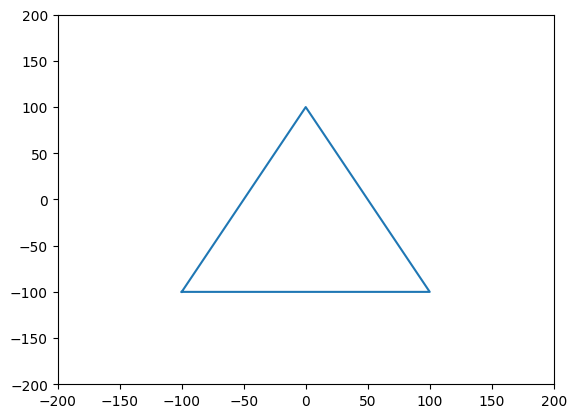

In [26]:
A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


In [30]:
# Определите матрицу объекта
A = np.array([[-100, -100, 1], [0, 100, 1], [100, -100, 1], [-100, -100, 1]])

# Определите матрицу масштабирования
scale = np.array([[0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]])

# Определите матрицу смещения
shift = np.array([[1, 0, 200], [0, 1, 300], [0, 0, 1]])

# Примените матрицы трансформаций к объекту
transformed_A = np.dot(shift, np.dot(scale, A.T)).T


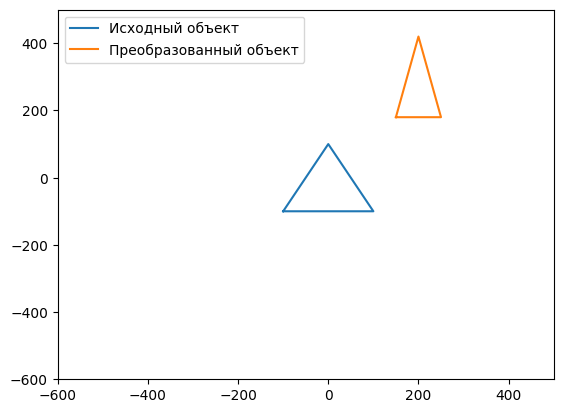

In [35]:
plt.plot(A[:,0], A[:,1], label='Исходный объект')
plt.plot(transformed_A[:,0], transformed_A[:,1], label='Преобразованный объект')
plt.ylim([-600, 500])
plt.xlim([-600, 500])
plt.legend()
plt.show()

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [22]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [69]:
### YOUR CODE HERE
eigenvalues, eigenvectors = np.linalg.eig(m)
print("Собственные значения:", eigenvalues)
print("Собственные вектора:", eigenvectors)

Собственные значения: [ 3. -1.]
Собственные вектора: [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [37]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [38]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

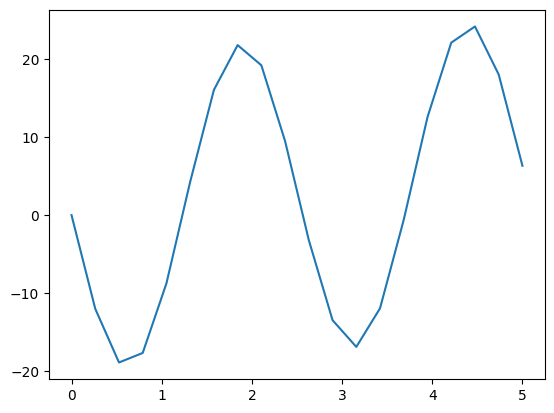

In [39]:
plt.plot(x, fx)
plt.show()

In [40]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [42]:
### YOUR CODE HERE --  наугад, в лекциях ничего не увидел подобного
result = minimize(error, [0, 0], method='COBYLA')
print(result.x)

[ 3.00018796 -2.50008926]


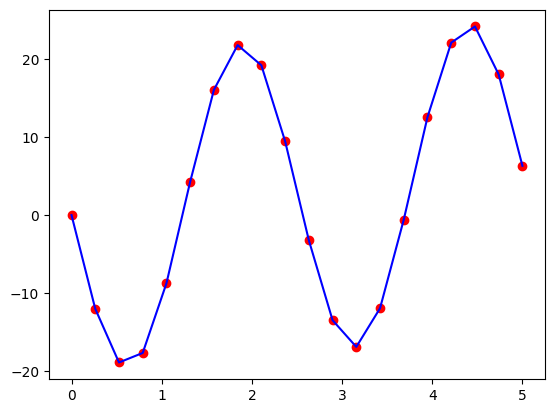

In [44]:
plt.plot(x, fx,'ro', label='original data')
plt.plot(x,f(x,3.00018796,-2.50008926), 'b-', label ='model function')
plt.show()

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [48]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [49]:
# Вычислите косинусную схожесть
cosine_sim = np.dot(raitings, raitings.T) / (np.linalg.norm(raitings, axis=1) * np.linalg.norm(raitings, axis=1)[:, np.newaxis])

# Найдите наиболее похожего пользователя для каждого пользователя
pairs = []
for i in range(len(cosine_sim)):
    cosine_sim[i,i] = -1
    max_sim = np.max(cosine_sim[i])
    max_sim_index = np.argmax(cosine_sim[i])
    pairs.append((i, max_sim_index))

print(pairs)

[(0, np.int64(8)), (1, np.int64(4)), (2, np.int64(9)), (3, np.int64(9)), (4, np.int64(8)), (5, np.int64(9)), (6, np.int64(3)), (7, np.int64(5)), (8, np.int64(0)), (9, np.int64(2))]
